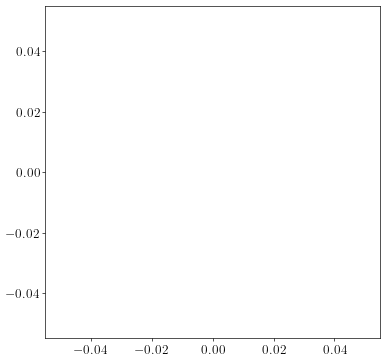

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex, HTML
import json
from utils import NormalForm, Cournot2, CournotN
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt
rng = np.random.default_rng(497)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk12_practice.json"
IMAGE_PATH = "../assets/images/wk12"
probs = []
nprob = 0

In [2]:
# Game types
df = pd.read_pickle("NormalForm_examples.pkl")
idx1 = df['gametype']=="Prisoner's Dilemma"
idx2 = df['gametype']=="Stag Hunt"
idx3 = df['gametype']=="Chicken"
idx4 = df['gametype']=="Rock Paper Scissors"

mydf = pd.concat([
    df.loc[idx1].sample(10, random_state=rng),
    df.loc[idx2].sample(10, random_state=rng),
    df.loc[idx3].sample(10, random_state=rng),
    df.loc[idx4].sample(10, random_state=rng)
])
for idx, row in mydf.iterrows():
    params = row['params']
    prob = NormalForm(params)
    players = prob.players
    strategies = prob.strategies
    br = prob.br
    ne = prob.ne
    setup = fr"""
<p>Consider the 2-player game described by the normal form below:</p>
"""
    setup += prob.table_as_html()
    setup += fr"""
<p>1. Write down the best response functions for each player.</p>
<p>2. Find the Nash equilibria.</p>
<p>3. Do the strategic dynamics of this game most resemble Prisoner's Dilemma, Stag Hunt, Chicken, or Rock Paper Scissors?</p>
"""
    solution = ''
    for s2 in strategies[1]:
        solution += fr"<p>{players[0]}'s best response(s) to {players[1]} choosing {s2} are: {repr(br[players[0]][s2])}</p>" + '\n'
    for s1 in strategies[0]:
        solution += fr"<p>{players[1]}'s best response(s) to {players[0]} choosing {s1} are: {repr(br[players[1]][s1])}</p>" + '\n'
    solution += fr"<p>There are {len(ne)} Nash equilibria: {repr(ne)}</p>"
    solution += fr"<p>The game is most similar to {params['gametype']}.<p>"
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

40


In [3]:
# Game types
df = pd.read_pickle("NormalForm_examples.pkl")
idx1 = df['gametype']=="Generic 2x2"
idx2 = df['gametype']=="Generic 3x3"

mydf = pd.concat([
    df.loc[idx1].sample(15, random_state=rng),
    df.loc[idx2].sample(15, random_state=rng),
])
for idx, row in mydf.iterrows():
    params = row['params']
    prob = NormalForm(params)
    players = prob.players
    strategies = prob.strategies
    br = prob.br
    ne = prob.ne
    setup = fr"""
<p>Consider the 2-player game described by the normal form below:</p>
"""
    setup += prob.table_as_html()
    setup += fr"""
<p>1. Write down the best response functions for each player.</p>
<p>2. Find the Nash equilibria.</p>
"""
    solution = ''
    for s2 in strategies[1]:
        solution += fr"<p>{players[0]}'s best response(s) to {players[1]} choosing {s2} are: {repr(br[players[0]][s2])}</p>" + '\n'
    for s1 in strategies[0]:
        solution += fr"<p>{players[1]}'s best response(s) to {players[0]} choosing {s1} are: {repr(br[players[1]][s1])}</p>" + '\n'
    solution += fr"<p>There are {len(ne)} Nash equilibria: {repr(ne)}</p>"
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

70


In [4]:
# Cournot with two firms
df = pd.read_csv("Cournot2_examples.csv")
idx1 = (df['a1']==df['a2']) & (df['b1']==0) & (df['b2']==0) # no square terms, symmetric
idx2 = (df['a1']==df['a2']) & (df['b1']==df['b2']) & (df['b1']>0) # with square terms, symmetric
idx3 = (~idx1) & (~idx2)  # all else
mydf = pd.concat([
    df.loc[idx1].sample(10, random_state=rng),
    df.loc[idx2].sample(10, random_state=rng),
    df.loc[idx3].sample(25, random_state=rng)
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = Cournot2(params)
    q1 = prob.sol['q1']
    q2 = prob.sol['q2']
    p = prob.sol['p']
    profit1 = prob.sol['profit1']
    profit2 = prob.sol['profit2']
    setup = prob.setup()
    setup += fr"""
<p>Calculate the quantities chosen by each firm in the Nash equilibrium. Calculate the price in the Nash equilibrium. What profit does each firm make?</p>
"""
    solution = fr"""
\(q_1 = {q1:g}\), \(q_2 = {q2:g}\), \(p = {p:g}\), \(\Pi_1 = {profit1:g}\), \(\Pi_2 = {profit2:g}\)
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

115


In [5]:
# Cournot with N firms
df = pd.read_csv("CournotN_examples.csv")
idx1 = (df['N']>2) & (df['N']<10) # 2<N<10 firms
idx2 = (df['N']>=10)
mydf = pd.concat([
    df.loc[idx1].sample(15, random_state=rng),
    df.loc[idx2].sample(10, random_state=rng),
])
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = CournotN(params)
    q = prob.sol['q']
    p = prob.sol['p']
    profit = prob.sol['profit']
    setup = prob.setup()
    setup += fr"""
<p>Calculate the quantities chosen by each firm in the Nash equilibrium. Calculate the price in Nash equilibrium. What profit does each firm make?</p>
"""
    solution = fr"""
\(q_i = {q:g}\), \(p = {p:g}\), \(\Pi_i = {profit:g}\)
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

140


In [6]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [7]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [8]:
prob = np.random.choice(myprobs)
display(HTML(prob['setup']))
display(HTML(prob['solution']))